In [1]:
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb

In [2]:
repos

['jenkinsci/jenkins']

updating jenkinsci/jenkins...
Repo is up to date!
Using precalculated structural values

Results from the structural view:

WeightGraph statistics: 1298 nodes, 4654 edges, 3 connected component(s), with sizes: [1292, 4, 2]


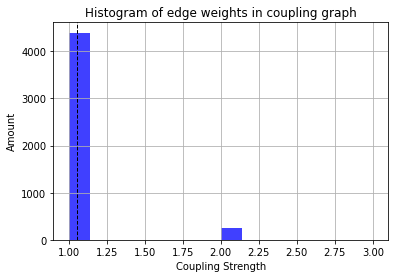

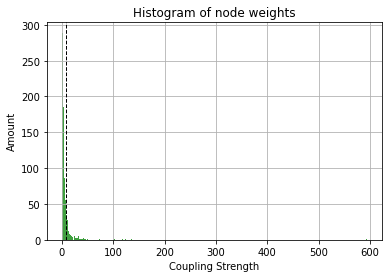



Using precalculated linguistic values

Results from the linguistic view:

WeightGraph statistics: 1639 nodes, 1342341 edges, 1 connected component(s), with sizes: [1639]


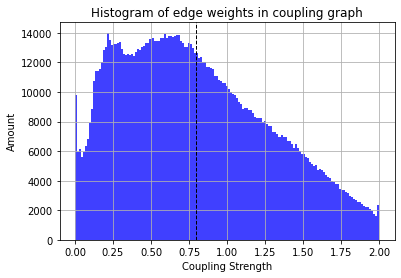

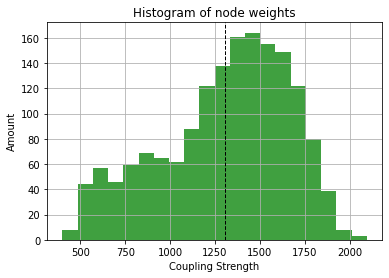




Program is over!


In [3]:
views = ["structural", "linguistic"]

for repo in repos:
    r = LocalRepo(repo)
    r.update()
    
    for view in views:
        # MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        coupling_graph.show_weight_histogram()
        # coupling_graph.visualize()
        print("\n")
    
    
print("\nProgram is over!")